<a href="https://colab.research.google.com/github/MayurJadhav123/itechnolabs_diabetes_prediction/blob/main/itechnolabs_submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement: Prediction of Diabetes using Machine Learning Algorithm

# Understanding data from CSV file

Data obtained from different csv files are in the form of train and test of 2 files each and it contains different features in the both of the files. So the two files merged together with total 70000 rows. In 'Age' column some of the rows are showing the age in the form of days and it is converted into years by calculations in csv file itself and then csv file was imported for data preprocessing

**Importing necessary dependencies**

In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning & Exploratory Data Analysis consists of following steps

1)Data Preprocessing

2)Data Visualization

3)Handling Missing Values 

4)Feature Engineering

5)Handling Imbalanced Data

6)Outlier Treatment

7)Feature Selection

8)Feature Scaling

**1)Data Preprocessing**

In [2]:
#import dataset
df = pd.read_csv('/content/drive/MyDrive/technolabs_assi/diabetes.csv')
df.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,age1,age,height,weight,gender,diabetes
0,79749,low,low,0,0,1,110\70,30,30,160,59.0,m,0
1,141,medium,low,0,0,1,120/80,39,39,162,60.0,f,0
2,162,low,low,0,0,1,110/70,39,39,173,75.0,f,0
3,257,low,low,0,0,1,120/80,39,39,182,NaN,f,0
4,859,low,low,1,0,1,123/80,39,39,170,97.0,f,0


In [3]:
#Transformed column from days to years to be considered as age1 so removed age
df1 = df.drop('age',axis=1)
df1

,id,cholesterol,gluc,smoke,alco,active,pressure,age1,height,weight,gender,diabetes
0,79749,low,low,0,0,1,110\70,30,160,59.0,m,0
1,141,medium,low,0,0,1,120/80,39,162,60.0,f,0
2,162,low,low,0,0,1,110/70,39,173,75.0,f,0
3,257,low,low,0,0,1,120/80,39,182,NaN,f,0
4,859,low,low,1,0,1,123/80,39,170,97.0,f,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,57321,low,low,0,0,1,120/80,65,165,74.0,m,0
69996,53805,low,low,0,0,1,120/80,65,165,64.0,f,0
69997,52297,high,low,1,0,1,120/80,65,163,55.0,f,1
69998,97124,low,low,0,0,1,120/80,65,178,75.0,m,0


In [4]:
df1.shape

(70000, 12)

In [5]:
#Handling Duplicates
df1.drop_duplicates()

,id,cholesterol,gluc,smoke,alco,active,pressure,age1,height,weight,gender,diabetes
0,79749,low,low,0,0,1,110\70,30,160,59.0,m,0
1,141,medium,low,0,0,1,120/80,39,162,60.0,f,0
2,162,low,low,0,0,1,110/70,39,173,75.0,f,0
3,257,low,low,0,0,1,120/80,39,182,NaN,f,0
4,859,low,low,1,0,1,123/80,39,170,97.0,f,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,57321,low,low,0,0,1,120/80,65,165,74.0,m,0
69996,53805,low,low,0,0,1,120/80,65,165,64.0,f,0
69997,52297,high,low,1,0,1,120/80,65,163,55.0,f,1
69998,97124,low,low,0,0,1,120/80,65,178,75.0,m,0


In [6]:
df1.shape
#There are not duplicate values in dataset

(70000, 12)

In [7]:
df1.describe()

,id,smoke,alco,active,age1,height,weight,diabetes
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,67682.000000,70000.000000
mean,49972.419900,0.088129,0.053771,0.803729,53.188771,164.359229,74.193823,0.250000
std,28851.302323,0.283484,0.225568,0.397179,6.770946,8.210126,14.638862,0.433016
min,0.000000,0.000000,0.000000,0.000000,30.000000,55.000000,10.000000,0.000000
25%,25006.750000,0.000000,0.000000,1.000000,48.000000,159.000000,64.000000,0.000000
50%,50001.500000,0.000000,0.000000,1.000000,54.000000,165.000000,71.000000,0.000000
75%,74889.250000,0.000000,0.000000,1.000000,58.000000,170.000000,82.000000,0.250000
max,99999.000000,1.000000,1.000000,1.000000,65.000000,250.000000,200.000000,1.000000


**Checking for Measures of Dispersion**


In [8]:
df1.std()
# Here std dev value for 'weight' is indicating that data is spread widely from it's mean

id          28851.302323
smoke           0.283484
alco            0.225568
active          0.397179
age1            6.770946
height          8.210126
weight         14.638862
diabetes        0.433016
dtype: float64

In [9]:
df1.var()

id          8.323976e+08
smoke       8.036307e-02
alco        5.088079e-02
active      1.577512e-01
age1        4.584571e+01
height      6.740617e+01
weight      2.142963e+02
diabetes    1.875027e-01
dtype: float64

In [10]:
df1.skew()
# Values of skewness for all the features are != 0 so the data is not normally distributed

id         -0.001278
smoke       2.905867
alco        3.956607
active     -1.529473
age1       -0.305975
height     -0.642187
weight      0.997867
diabetes    1.154725
dtype: float64

In [11]:
df1.kurt()

id          -1.198374
smoke        6.444250
alco        13.655125
active       0.339296
age1        -0.819479
height       7.943653
weight       2.407033
diabetes    -0.666629
dtype: float64

In [12]:
#Checking for Null values
df1.isnull().sum()
#Weight column consits of 2318 missing values.

id                0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
pressure          0
age1              0
height            0
weight         2318
gender            0
diabetes          0
dtype: int64

In [13]:
# unique values in diabetes coloumn. 1 corresponds to positive case and 0 to negative.
print(df1.diabetes.unique())

[0 1]


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   cholesterol  70000 non-null  object 
 2   gluc         70000 non-null  object 
 3   smoke        70000 non-null  int64  
 4   alco         70000 non-null  int64  
 5   active       70000 non-null  int64  
 6   pressure     70000 non-null  object 
 7   age1         70000 non-null  int64  
 8   height       70000 non-null  int64  
 9   weight       67682 non-null  float64
 10  gender       70000 non-null  object 
 11  diabetes     70000 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 6.4+ MB


In [15]:
#We will first of all check all the missing value Percentage for each of the column
features_with_na = [features for features in df1.columns if df1[features].isnull().sum()>1]
# Print the % of missing values in each feature
for feature in features_with_na:
    print(feature, np.round(df1[feature].isnull().mean(),4),'%missing values')

weight 0.0331 %missing values


**Data Visualization**

a) Univariate Analysis

In [16]:
df2 = df1.drop(['cholesterol','gluc','pressure','gender'],axis=1)
df2

,id,smoke,alco,active,age1,height,weight,diabetes
0,79749,0,0,1,30,160,59.0,0
1,141,0,0,1,39,162,60.0,0
2,162,0,0,1,39,173,75.0,0
3,257,0,0,1,39,182,NaN,0
4,859,1,0,1,39,170,97.0,0
...,...,...,...,...,...,...,...,...
69995,57321,0,0,1,65,165,74.0,0
69996,53805,0,0,1,65,165,64.0,0
69997,52297,1,0,1,65,163,55.0,1
69998,97124,0,0,1,65,178,75.0,0


<Figure size 432x288 with 0 Axes>

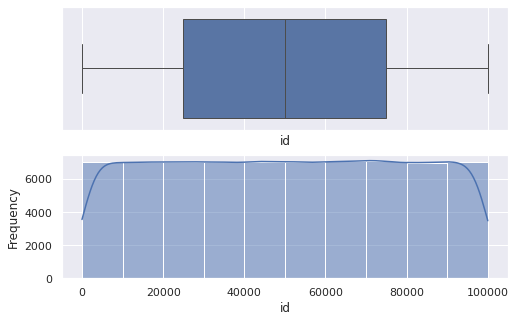

<Figure size 576x360 with 0 Axes>

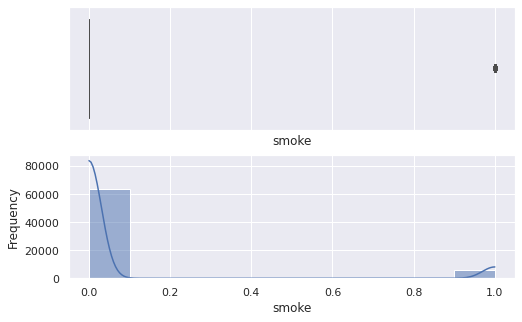

<Figure size 576x360 with 0 Axes>

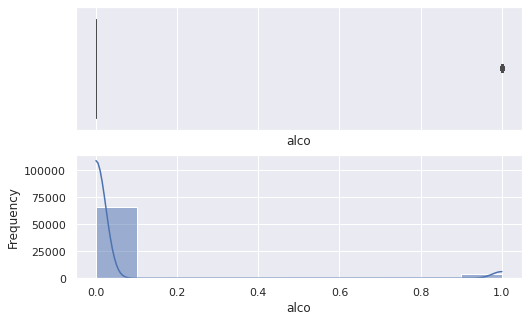

<Figure size 576x360 with 0 Axes>

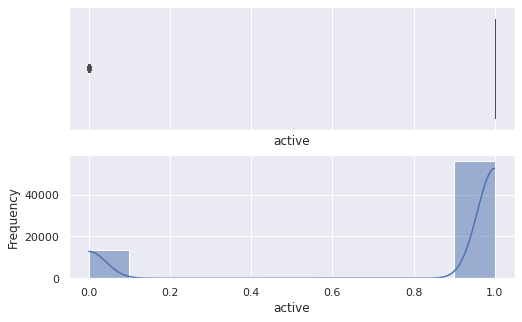

<Figure size 576x360 with 0 Axes>

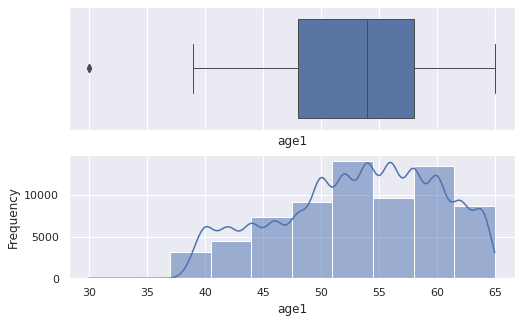

<Figure size 576x360 with 0 Axes>

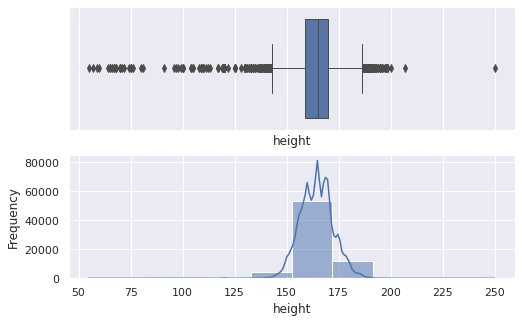

<Figure size 576x360 with 0 Axes>

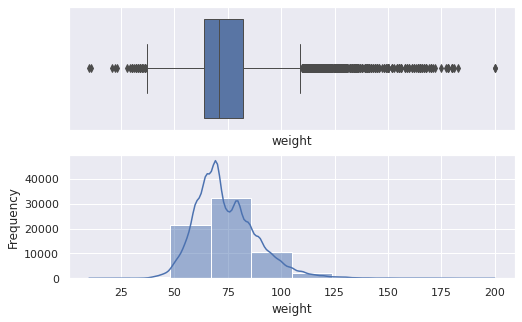

<Figure size 576x360 with 0 Axes>

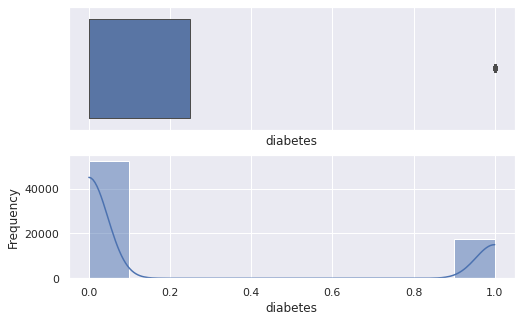

In [17]:
#Plotting the boxplot & Histplot, Boxplot gives the idea of outliers in terms of visualization plot
for i in df2.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df2[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df2[i], ax=ax_hist , bins = 10,kde=True)
    plt.show()

**Boxplots for weight, height are showing more outliers**

<Figure size 576x360 with 0 Axes>

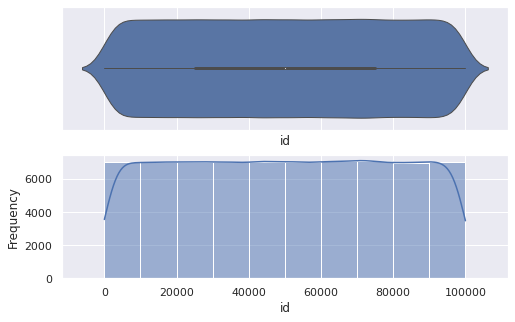

<Figure size 576x360 with 0 Axes>

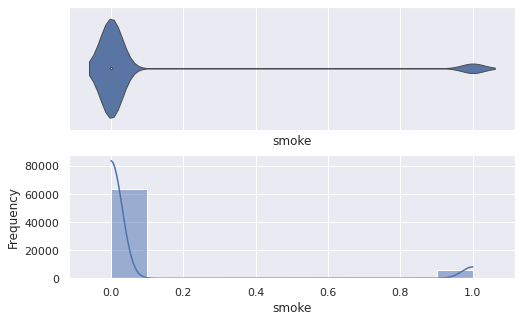

<Figure size 576x360 with 0 Axes>

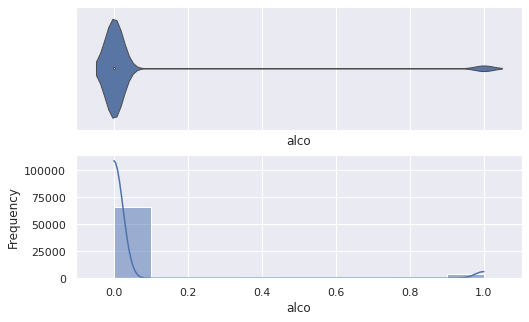

<Figure size 576x360 with 0 Axes>

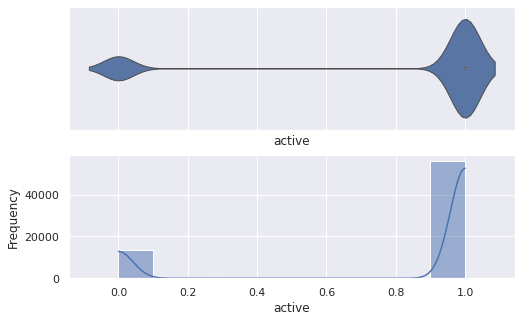

<Figure size 576x360 with 0 Axes>

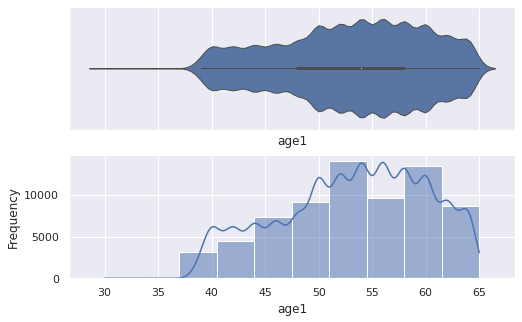

<Figure size 576x360 with 0 Axes>

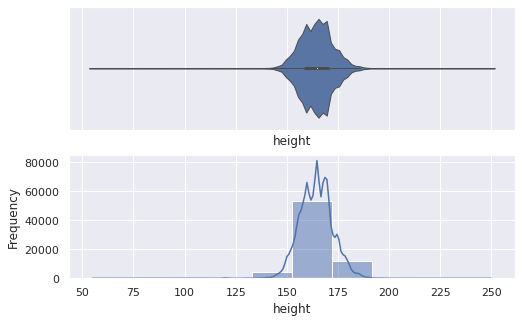

<Figure size 576x360 with 0 Axes>

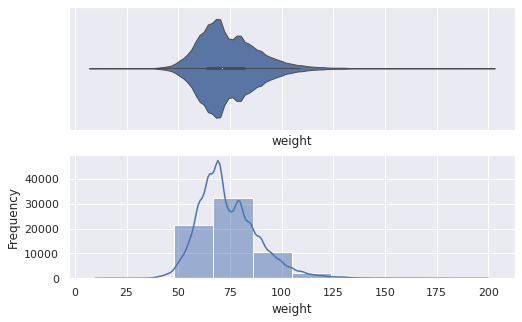

<Figure size 576x360 with 0 Axes>

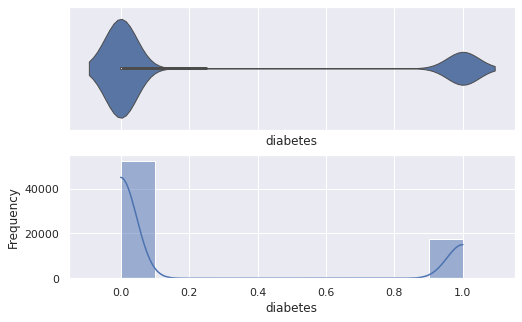

In [18]:
#Plotting the violinplot
for i in df2.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_vio, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.violinplot(df2[i], ax=ax_vio , linewidth= 1.0)
    sns.histplot(df2[i], ax=ax_hist , bins = 10,kde=True)

#Violin plots allow for quickly approximating where the data is centered and how it is spread.

**Violin plots are a great way of visualizing multimodal data. In smoke, alco there is bimodal distribution which is clearly observed in violin plot with the help of Probability Density Function**

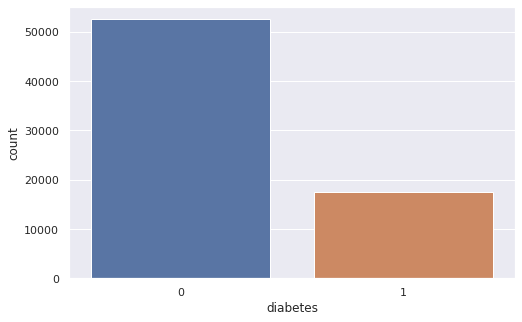

In [19]:
#Checking the data whether balanced or imbalanced
# diabetes countplot
sns.countplot(x = 'diabetes',data = df2)
# diabetes = 1, no_diabetes = 0
# Following countplot indicates that the data consists of the people with diabetes is less than 30% as compared to no_diabetes. So our data is imbalanced data

**Bivariate Analysis**

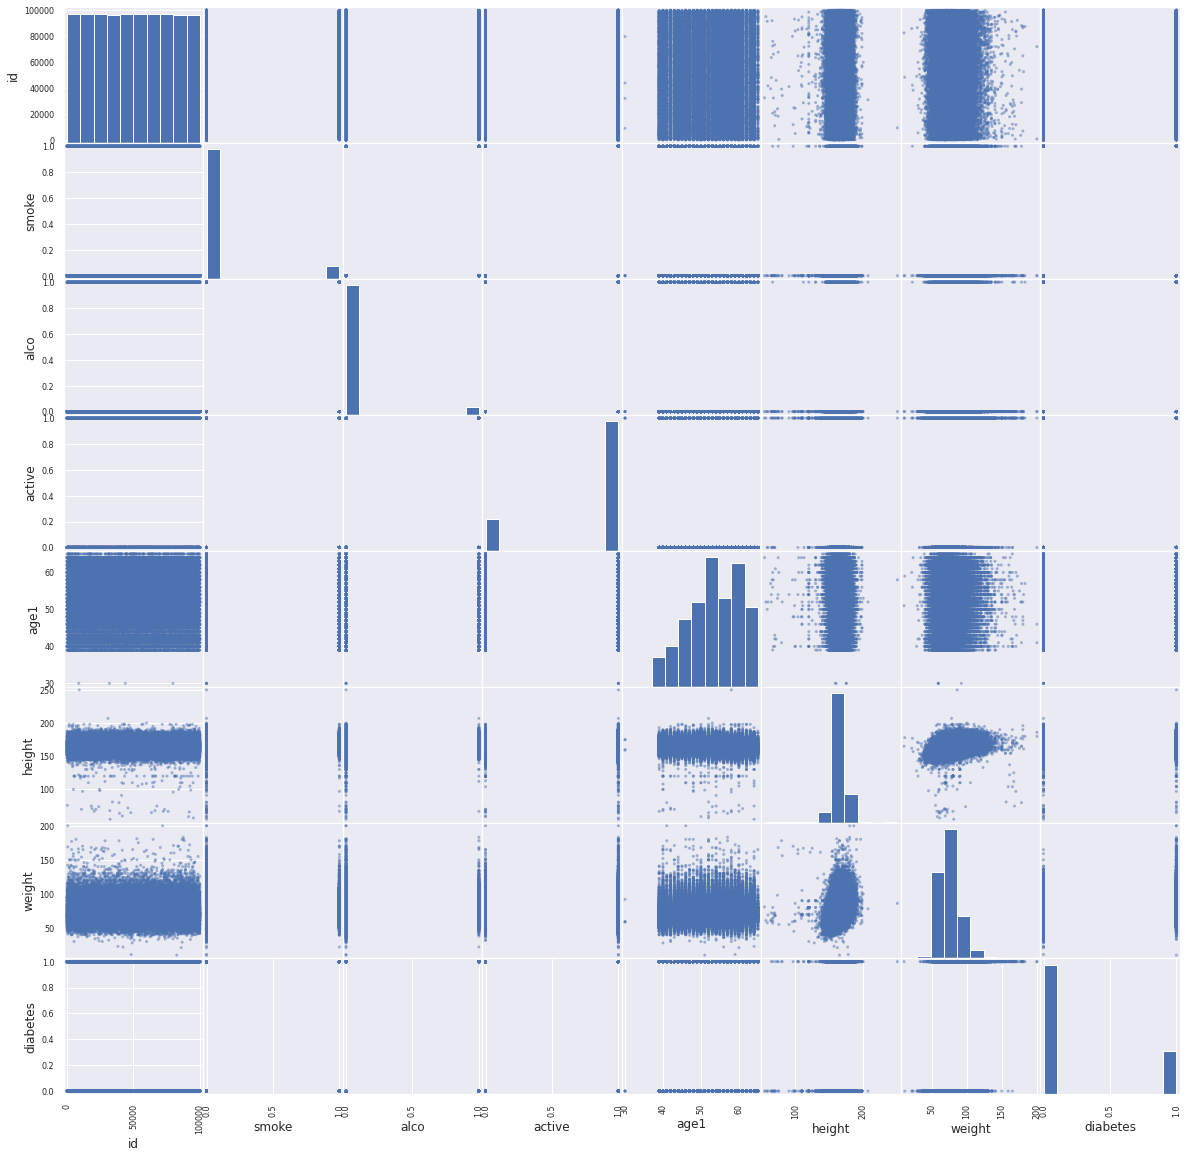

In [20]:
# Scatter plot matrix 
from pandas.plotting import scatter_matrix
import pandas.plotting
scatter_matrix(df1, figsize = (20, 20));
# From Scatter plot is clearly indicating that the numeric variables are not correlated and does not possess any pattern in visualization

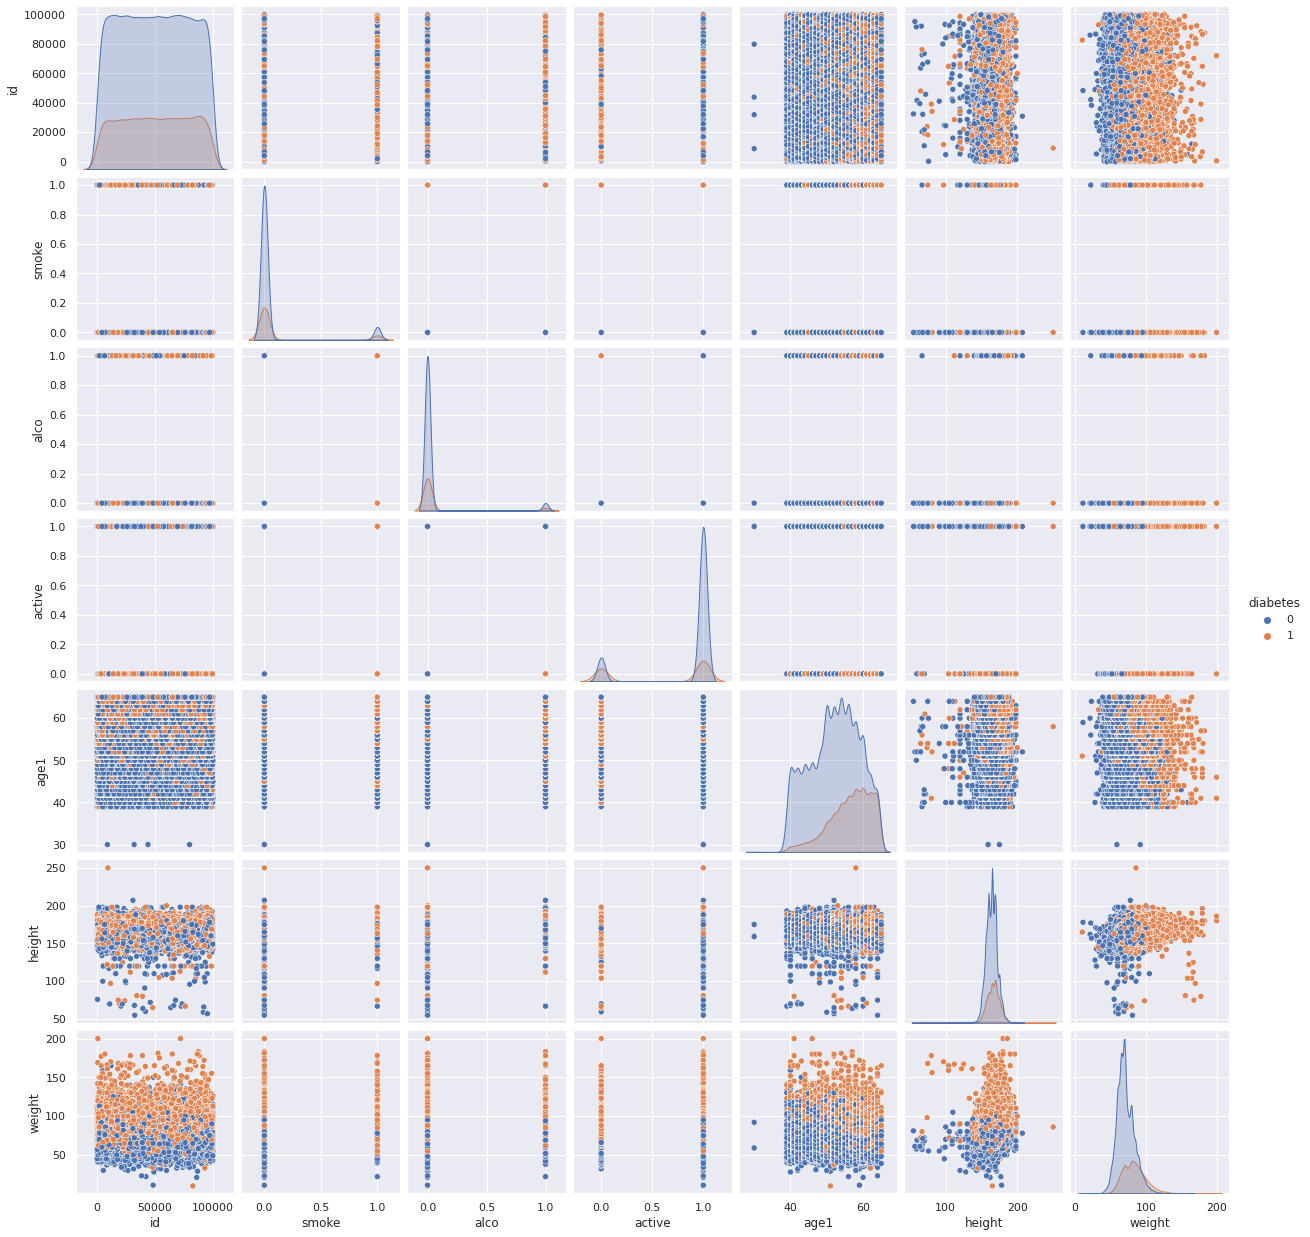

In [21]:
# Pairplot 
sns.pairplot(data = df2, hue = 'diabetes')
plt.show()
#Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

**3)Handling Missing Values**

In dataset, only weight column consist of missing values so it needs to be handled because the missing data will decrease the predictive power of your model. If you apply algorithms with missing data, then there will be bias in the estimation of parameters. You cannot be confident about your results if you don’t handle missing data.

In [22]:
df2['weight'] = df2['weight'].fillna(df2['weight'].median())
df2
# For this column I am using the median imputation instead of mean beacause it contains the outliers and mean is greatly affected by outliers

,id,smoke,alco,active,age1,height,weight,diabetes
0,79749,0,0,1,30,160,59.0,0
1,141,0,0,1,39,162,60.0,0
2,162,0,0,1,39,173,75.0,0
3,257,0,0,1,39,182,71.0,0
4,859,1,0,1,39,170,97.0,0
...,...,...,...,...,...,...,...,...
69995,57321,0,0,1,65,165,74.0,0
69996,53805,0,0,1,65,165,64.0,0
69997,52297,1,0,1,65,163,55.0,1
69998,97124,0,0,1,65,178,75.0,0


**4)Feature Engineering**

**Label Encoding for categorical features in the dataset such as cholesterol,gender,glucose, pressure**

In [23]:
df_numeric = df2[['id', 'smoke', 'alco', 'active', 'age1', 'height','weight','diabetes']]
df_categorical = df1[['cholesterol', 'gluc', 'pressure', 'gender' ]]

In [24]:
df_categorical.head()

,cholesterol,gluc,pressure,gender
0,low,low,110\70,m
1,medium,low,120/80,f
2,low,low,110/70,f
3,low,low,120/80,f
4,low,low,123/80,f


In [25]:
df1.columns

Index(['id', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'pressure',
       'age1', 'height', 'weight', 'gender', 'diabetes'],
      dtype='object')

**Reason for using Label Encoding** : One-Hot Encoding results in a Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables.The Dummy Variable Trap leads to the problem known as multicollinearity. Multicollinearity occurs where there is a dependency between the independent features. Multicollinearity is a serious issue in machine learning models like Linear Regression and Logistic Regression. So that I used the label encoding for categorical variables are available in dataset

In [26]:
from sklearn.preprocessing import LabelEncoder
diabetes_encoder = LabelEncoder()

In [27]:
le = LabelEncoder()

In [28]:
# apply "le.fit_transform"
df_encoded = df_categorical.apply(le.fit_transform)
print(df_encoded)

       cholesterol  gluc  pressure  gender
0                1     1       162       1
1                2     1       314       0
2                1     1       135       0
3                1     1       314       0
4                1     1       383       0
...            ...   ...       ...     ...
69995            1     1       314       1
69996            1     1       314       0
69997            0     1       314       0
69998            1     1       314       1
69999            1     1       314       0

[70000 rows x 4 columns]


In [29]:
#Combining the encoded and numeric dataframe together
data = pd.concat([df_numeric,df_encoded],axis=1)
data

,id,smoke,alco,active,age1,height,weight,diabetes,cholesterol,gluc,pressure,gender
0,79749,0,0,1,30,160,59.0,0,1,1,162,1
1,141,0,0,1,39,162,60.0,0,2,1,314,0
2,162,0,0,1,39,173,75.0,0,1,1,135,0
3,257,0,0,1,39,182,71.0,0,1,1,314,0
4,859,1,0,1,39,170,97.0,0,1,1,383,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,57321,0,0,1,65,165,74.0,0,1,1,314,1
69996,53805,0,0,1,65,165,64.0,0,1,1,314,0
69997,52297,1,0,1,65,163,55.0,1,0,1,314,0
69998,97124,0,0,1,65,178,75.0,0,1,1,314,1


In [30]:
data.columns

Index(['id', 'smoke', 'alco', 'active', 'age1', 'height', 'weight', 'diabetes',
       'cholesterol', 'gluc', 'pressure', 'gender'],
      dtype='object')

In [31]:
data.isnull().sum()
# No missing values remainig in the dataset

id             0
smoke          0
alco           0
active         0
age1           0
height         0
weight         0
diabetes       0
cholesterol    0
gluc           0
pressure       0
gender         0
dtype: int64

**5)Handling Imbalanced Data**

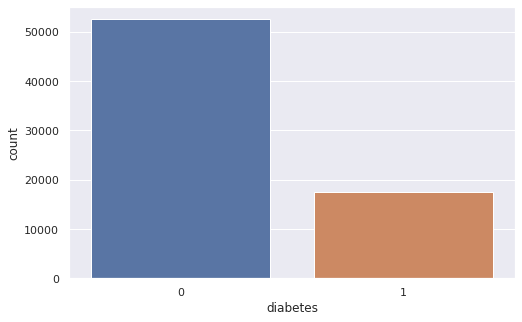

In [32]:
#Checking the data whether balanced or imbalanced
# diabetes countplot
sns.countplot(x = 'diabetes',data = df2)
# diabetes = 1, no_diabetes = 0
# Following countplot indicates that the data consists of the people with diabetes is less than 30% as compared to no_diabetes. So our data is imbalanced data

In [33]:
y = data['diabetes'].astype(int)
#Seperate object from input features
X = data.drop('diabetes',axis=1)

**As data consits of diabetes with positive = 1 is very less than diabetes with negative =0 in proportion. So the data is imbalanced which may create the problem of correct prediction of diabetes and which may give faulty prediction. So we need to perform oversampling to make data balanced.**

In [34]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_os, y_os = ros.fit_resample(X,y)
X_os.shape, y_os.shape

((105000, 11), (105000,))

**6)Outlier Treatment**

In [35]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 14.5 MB/s 


**Reason for using Winsorization Technique for handling outliers:** It makes sense to winsorize data when we want to retain the observations that are at the extremes but we don't want to take them too literally

In [36]:
from feature_engine.outliers import Winsorizer
IQR = data.quantile(0.75) - data.quantile(0.25)
lower_limit = data.quantile(0.25) - (IQR * 1.5)
upper_limit = data.quantile(0.75) + (IQR * 1.5)

for i in data:
    winsor = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=[i])
    data[i] = winsor.fit_transform(data[[i]])

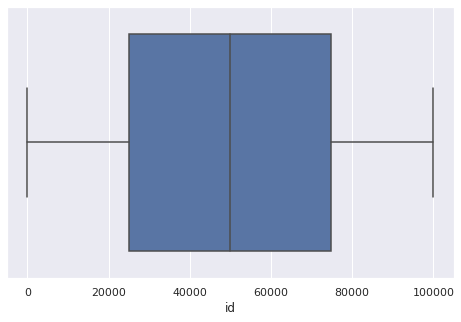

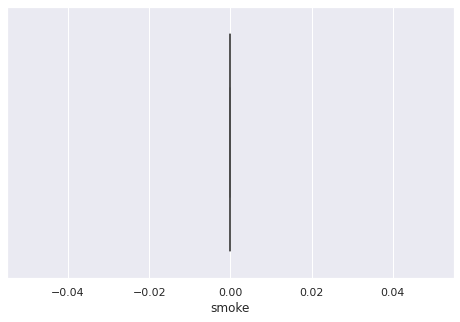

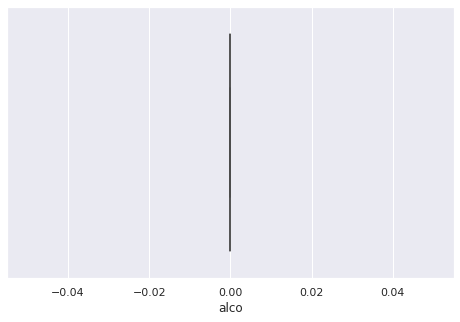

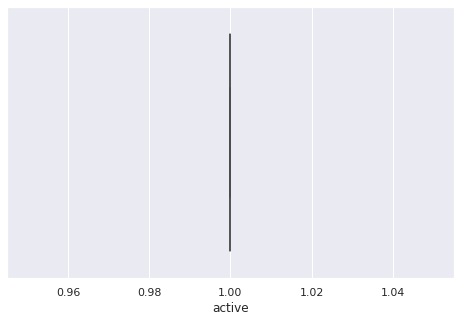

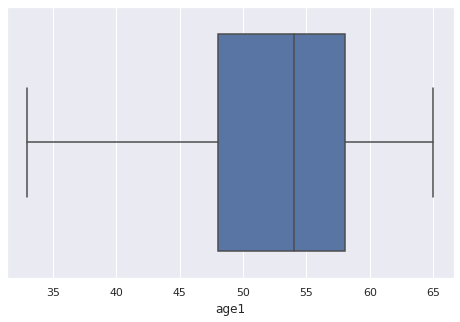

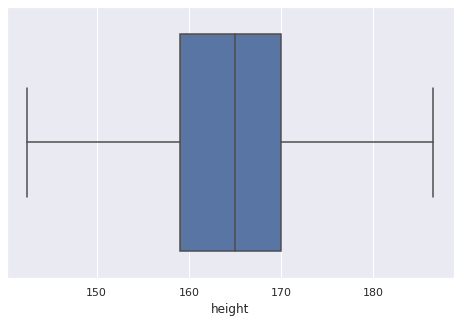

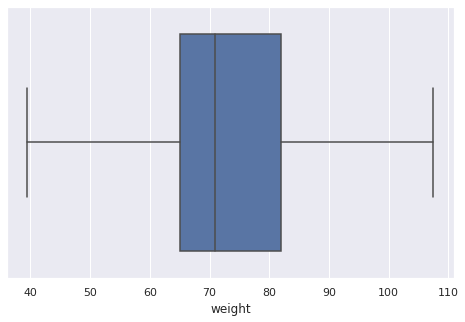

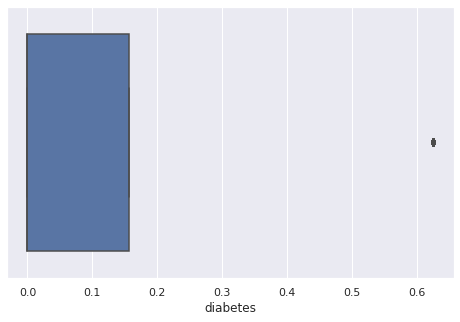

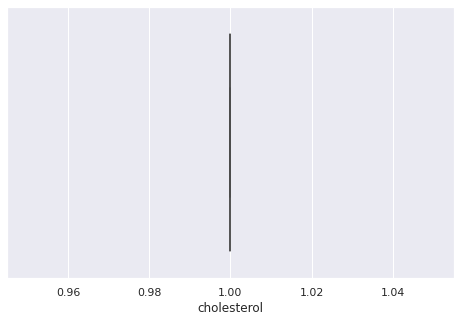

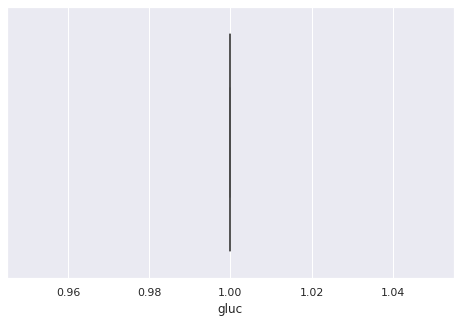

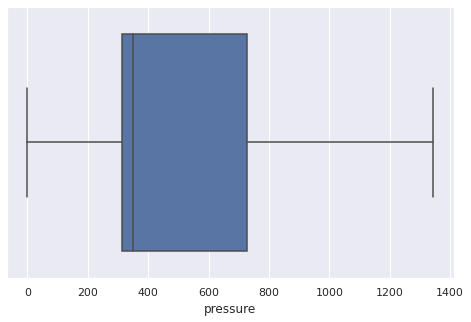

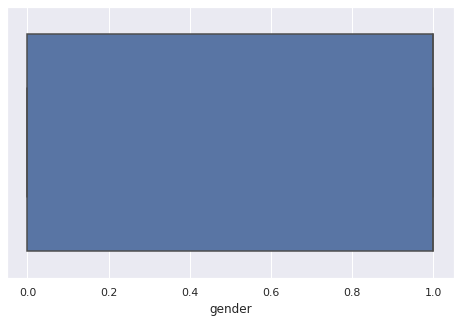

In [37]:
import seaborn as sns
for feature in data:
    sns.boxplot(data[feature])
    plt.show()

**7)Feature Selection**

The sns.heatmap is used to visualize the features in the form of correlation coeffient. If two variables are highly correlated then we drop either of them from dataframe because it gives same effect on the target variable.

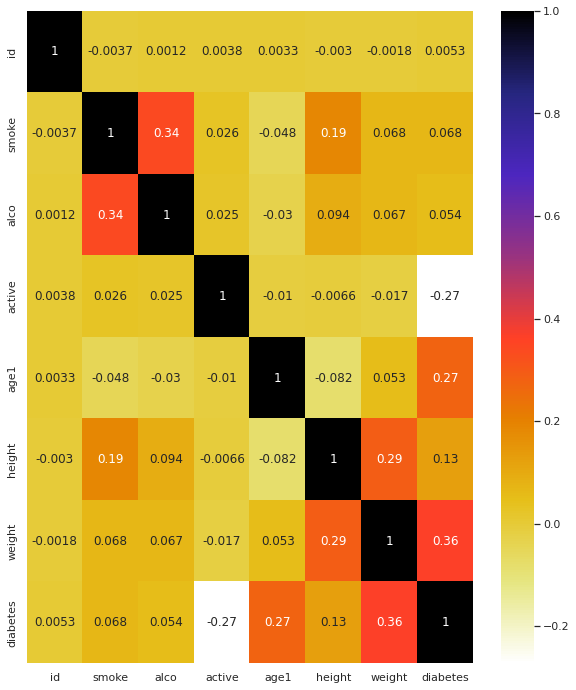

In [38]:
#Pearson Correlation 
plt.figure(figsize=(10, 12))
cor = df2.corr()
sns.heatmap(cor,annot=True, cmap = plt.cm.CMRmap_r)
plt.show()

In [39]:
#with the follwing function we can select highly correlated features 
#it will remove the features that is correlated with anything other feature
def correlation(df2, threshold):
    col_corr = set()   #set of all the names of correlated columns
    corr_matrix = df2.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold: #we interested in absolute coefficient values 
                colname = corr_matrix.columns[i]   #getting the name of column
                col_corr.add(colname)
    return col_corr

In [40]:
corr_features = correlation(df2, 0.7)
len(set(corr_features))
# There are zero no. of features are highly correlated so we don't need tp drop the any of the feature from dataset

0

**Now data is cleaned for model building**

#Apply the Machine Learning Algorithm-Classification Algorithm
1)Logistic Regression

2)KNN

3)Naive Bayes

4)SVM

5)Decision Tree

6)Random F0rest

**8) Feature Scaling**

Before model building it necessary to scale the features for that matter standard scaler is used


In [78]:
# Apply Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

In [79]:
#Train Test Split

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state = 7)

**1)Logistic Regression**

In [81]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [82]:
lr_pred = lr.predict(X_test)
lr_pred

array([0, 0, 0, ..., 1, 1, 1])

**2)KNearestneighbourClassifier(KNN)**

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 0, ..., 0, 1, 0])

**3)Naive-Bayes Classifier**

In [85]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [86]:
nb_pred = nb.predict(X_test)
nb_pred

array([0, 0, 0, ..., 0, 1, 0])

**4)Support Vector Machine**

In [87]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)

SVC()

In [88]:
svm_pred = sv.predict(X_test)
svm_pred

array([0, 0, 0, ..., 0, 1, 0])

**5)DecisionTree**

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [90]:
dt_pred = dt.predict(X_test)
dt_pred

array([0, 0, 0, ..., 1, 1, 0])

**6)Random Forest**

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
rf_pred = rf.predict(X_test)
rf_pred

array([0, 0, 0, ..., 0, 1, 0])

**Model Evaluation**

**Test & Test Score**

In [93]:
# Train and Test Score for Logistic Regression
from sklearn.metrics import accuracy_score
print("Train Accuracy of Logistic Regression", lr.score(X_train, y_train)*100)
print("Accuracy (Test) score of Logistic Regression", lr.score(X_test, y_test)*100)
print("Accuacy (Test) score of Logistic Regression",accuracy_score(y_test, lr_pred)*100)

Train Accuracy of Logistic Regression 86.46428571428572
Accuracy (Test) score of Logistic Regression 86.82142857142857
Accuacy (Test) score of Logistic Regression 86.82142857142857


In [94]:
# Train and Test Score for KNN
print("Train Accuracy of KNN", knn.score(X_train, y_train)*100)
print("Accuracy (Test) score of KNN", knn.score(X_test, y_test)*100)
print("Accuacy (Test) score of KNN",accuracy_score(y_test, knn_pred)*100)

Train Accuracy of KNN 96.49464285714285
Accuracy (Test) score of KNN 95.01428571428572
Accuacy (Test) score of KNN 95.01428571428572


In [95]:
# Train and Test Score for NB
print("Train Accuracy of NB", nb.score(X_train, y_train)*100)
print("Accuracy (Test) score of NB", nb.score(X_test, y_test)*100)
print("Accuacy (Test) score of NB",accuracy_score(y_test, nb_pred)*100)

Train Accuracy of NB 88.02321428571429
Accuracy (Test) score of NB 87.43571428571428
Accuacy (Test) score of NB 87.43571428571428


In [96]:
# Train and Test Score for DT
print("Train Accuracy of DT", dt.score(X_train, y_train)*100)
print("Accuracy (Test) score of dt", dt.score(X_test, y_test)*100)
print("Accuacy (Test) score of dt",accuracy_score(y_test, dt_pred)*100)

Train Accuracy of DT 100.0
Accuracy (Test) score of dt 95.00714285714285
Accuacy (Test) score of dt 95.00714285714285


In [97]:
# Train and Test Score for RF
print("Train Accuracy of RF", rf.score(X_train, y_train)*100)
print("Accuracy (Test) score of RF", rf.score(X_test, y_test)*100)
print("Accuacy (Test) score of RF",accuracy_score(y_test, rf_pred)*100)

Train Accuracy of RF 100.0
Accuracy (Test) score of RF 96.3
Accuacy (Test) score of RF 96.3


In [98]:
# Train and Test Score for SVM
print("Train Accuracy of SVM", sv.score(X_train, y_train)*100)
print("Accuracy (Test) score of SVM", sv.score(X_test, y_test)*100)
print("Accuacy (Test) score of svm",accuracy_score(y_test, svm_pred)*100)

Train Accuracy of SVM 96.41071428571428
Accuracy (Test) score of SVM 96.02857142857142
Accuacy (Test) score of svm 96.02857142857142


**Selecting the best algorithm on the basis of accuracy obtained from data it is correctly predicting 96%**

**Confusion Matrix**

**For SVM**

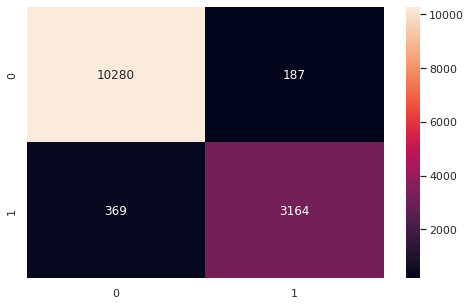

In [99]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(confusion_matrix(y_test, svm_pred),annot=True, fmt = "d")

**Classification Report**

In [100]:
print('Classifiaction Report of Logistic Regression: \n',classification_report(y_test,svm_pred,digits=4))

Classifiaction Report of Logistic Regression: 
               precision    recall  f1-score   support

           0     0.9653    0.9821    0.9737     10467
           1     0.9442    0.8956    0.9192      3533

    accuracy                         0.9603     14000
   macro avg     0.9548    0.9388    0.9465     14000
weighted avg     0.9600    0.9603    0.9599     14000



**Conclusion from Classification Report**

**1)Precision-Model identifies the diabetes is positive = 1 and  it is correct 94.42% of the time.**

**2)Precision-Model identifies the diabetes is negative = 0 and  it is correct 96.53% of the time.**

**3)Our model has a recall of 0.9737—in other words, it correctly identifies 97.37% of all negative diabetes patients**

**4)Our model has a recall of 0.9192—in other words, it correctly identifies 91.92 % of all positive diabetes patients**

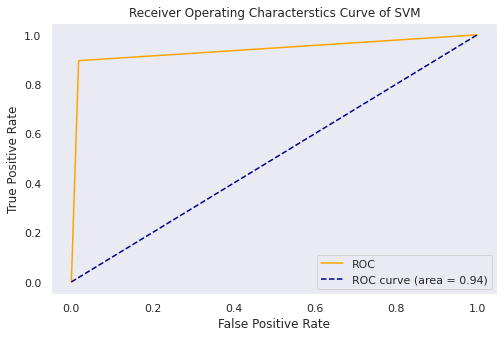

In [101]:
#Area under Curve
from sklearn.metrics import accuracy_score,roc_auc_score, roc_curve
auc = roc_auc_score(y_test,svm_pred)
fpr, tpr , thresholds = roc_curve(y_test, svm_pred)
plt.plot(fpr, tpr, color='orange', label = 'ROC')
plt.plot([0,1],[0,1], color = 'darkblue',linestyle = '--', label='ROC curve (area = %0.2f)' %auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics Curve of SVM')
plt.legend()
plt.grid()
plt.show()

**Prediction for New Dataset**

In [102]:
X_train[0].reshape(1,-1)

array([[ 0.12237248, -0.31087913, -0.23838436,  0.49416711,  1.00595655,
         0.44345206, -0.21436422, -0.0422706 ,  0.00519574,  1.3963595 ,
         0.73310834]])

In [103]:
#Transformation of New Data
scaler.transform(X_train[0].reshape(1,-1))

array([[ -1.73207621,  -1.40752496,  -1.29521146,  -0.77940581,
         -7.70692747, -19.96521613,  -5.15785704,  -2.1218516 ,
         -2.56084772,  -1.53657078,   0.17339297]])

In [104]:
sv.predict(scaler.transform(X_train[0].reshape(1,-1)))

array([1])

**Pickling The Model For Deployment**

In [105]:
import pickle
pickle.dump(sv, open('svmclassifier.pkl','wb'))
pickled_model = pickle.load(open('svmclassifier.pkl','rb'))

In [106]:
#Prediction
pickled_model.predict(scaler.transform(X_train[0].reshape(1,-1)))

array([1])

**Out of 6 Classification algorithm SVM has given the good accuracy than others so SVM is used to build the ML model for predicting Diabetes of Patient**

#Hyperparameter Optimization by Using GridSearchCV

In [66]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [107]:
#Using GridSearchCV
from sklearn.model_selection import GridSearchCV
params_dict={'criterion':["gini", "entropy"],'splitter':["best", "random"],'max_depth':[1,2,3,4],'min_samples_split':[1,2,3],'min_samples_leaf':[1,2],'max_features':["auto", "sqrt", "log2"]}
scv=GridSearchCV(tree,params_dict,cv=10)
scv.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                                              splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']})

In [108]:
scv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [109]:
#Using DecisionTreeClassifier and fitting the data with above suggested parameters
tree=DecisionTreeClassifier(criterion= 'gini',max_depth= 3,max_features='sqrt',min_samples_leaf= 1,min_samples_split= 2,
splitter= 'random')
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', splitter='random')

In [110]:
tree.score(X_test,y_test)

0.7977142857142857

In [111]:
y_pred=tree.predict(X_test)

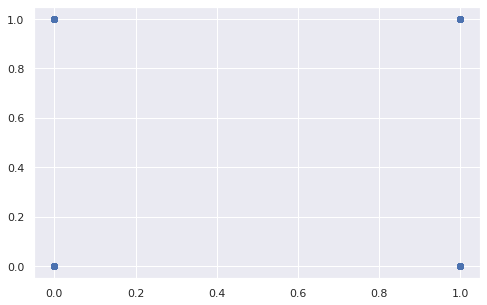

In [112]:
plt.scatter(y_test,y_pred)
plt.show()

**Hyperparameter Optimization using RandomizedSearchCV using XGBoost**

In [113]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [114]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [115]:
classifier=xgboost.XGBClassifier()

In [116]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search

RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [117]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [118]:
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 44.98 seconds.


In [119]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=6,
              min_child_weight=3)

In [120]:
classifier = xgboost.XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=3)

In [121]:
classifier.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.15, max_depth=6,
              min_child_weight=3)

In [122]:
y_pred = classifier.predict(X_test)

In [123]:
cm_h = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
print(cm_h)
print(score)

[[10370    97]
 [  273  3260]]
0.9735714285714285


In [124]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X_train, y_train.ravel(),cv=10)
score

array([0.97160714, 0.97571429, 0.97196429, 0.97285714, 0.97267857,
       0.97214286, 0.97517857, 0.97285714, 0.97071429, 0.97053571])

In [125]:
score.mean()

0.9726250000000001

**After Hyperparameter Optimization using GridSearchCV  the accuracy score is improved to 0.9726 and best_estimator is found to XGBClassifier because in hyperparameter Optimization using DT the accuracy got dropped**